In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys

from tools.viz import plot_from_files, plot_data_values

import seaborn as sns
sns.set()

DATA_DIR = Path('../data')
REAL_DATA = Path(DATA_DIR / 'MULTI_VP_profiles/')
PROC_DIR = Path(DATA_DIR / 'processed')

real_files = [f for f in PROC_DIR.iterdir()]
len(real_files)

11771

In [2]:
# removing the weird file
for f in real_files:
    df = pd.read_csv(f, sep=',')
    found = False
    for val in df['T [MK]']:
        if val > 15:
            real_files.remove(f)
            found = True
            print(f)
            break
    if found: break

../data/processed/profile_wso_CR1992_line_1504.csv


# Preliminary Analysis

Text(74.25, 0.5, 'α [deg]')

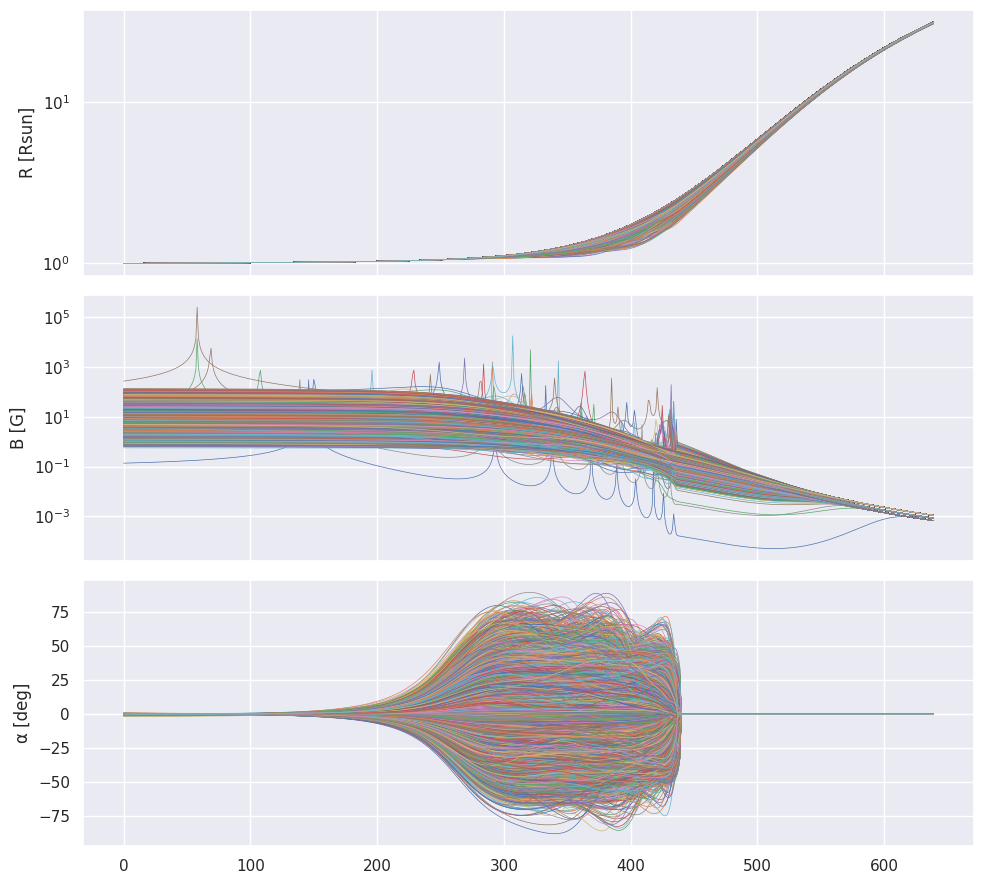

In [3]:
axs = plot_from_files(real_files, columns=['R [Rsun]', 'B [G]', 'alpha [deg]'], figsize=(10, 3*3), dpi=100)
axs[2].set_ylabel("α [deg]")


array([<Axes: ylabel='n [cm^-3]'>, <Axes: ylabel='v [km/s]'>,
       <Axes: ylabel='T [MK]'>], dtype=object)

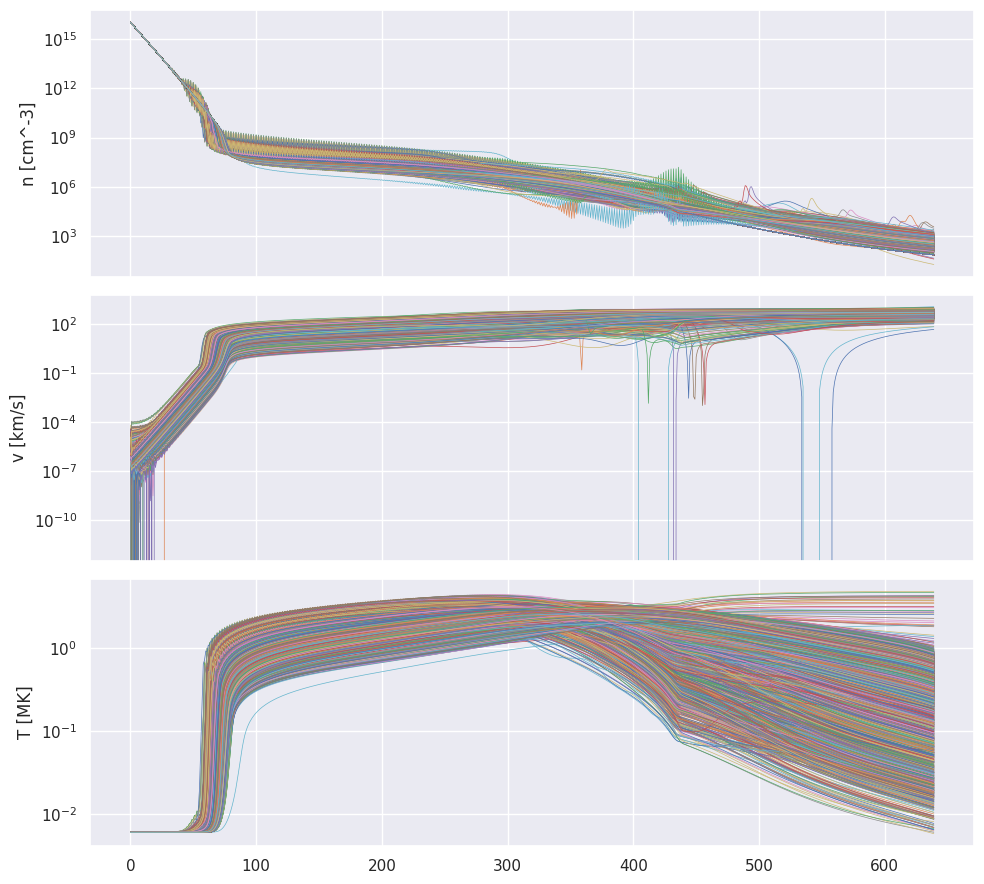

In [4]:
plot_from_files(real_files, columns=['n [cm^-3]', 'v [km/s]', 'T [MK]'], figsize=(10, 3*3), dpi=100)

# Input Data Analysis

In [2]:
inputs = pd.DataFrame(columns=['R [Rsun]', 'B [G]', 'alpha [deg]'])
inputs = [pd.read_csv(str(f), usecols=['R [Rsun]', 'B [G]', 'alpha [deg]']) for f in real_files]

## Absolute Magnetic Field

In [6]:
abs_mags = [inp["B [G]"].copy().abs() for inp in inputs]

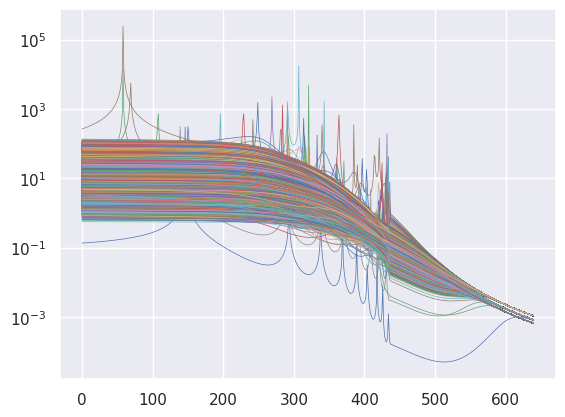

In [7]:
for mag_line in abs_mags:
    plt.plot(mag_line, linewidth=0.5)
plt.yscale('log')

In [4]:
abs_mag = []
bad_mags = []
for inp in inputs:
    npositive = inp[(inp["B [G]"] > 0)].shape[0]
    if npositive > 0 and npositive < 640: # are bad
        bad_mags.append(inp["B [G]"])
    if not npositive == 0: # all are negative
        abs_mag.append(inp["B [G]"].abs())
    else: # all are positive and some are bad
        abs_mag.append(inp["B [G]"])

print("Obvious corrupted files: ", len(bad_mags))
print("All files: ", len(inputs))

Obvious corrupted files:  0
All files:  11770


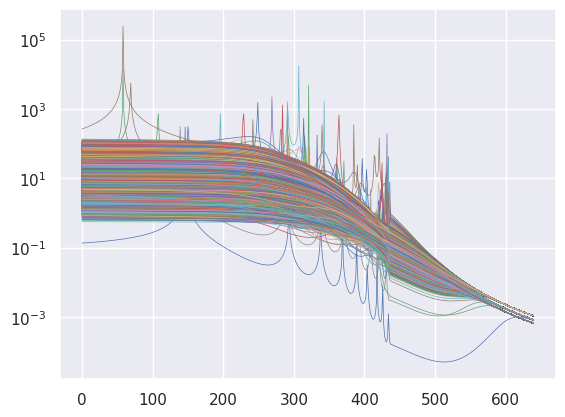

In [9]:
for mag_line in abs_mag:
    plt.plot(mag_line, linewidth=0.5)
plt.yscale('log')


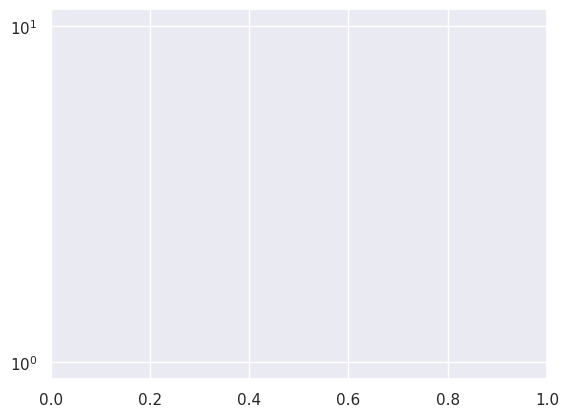

In [10]:
for mag_line in bad_mags: plt.plot(mag_line, linewidth=0.5)
plt.yscale('log')

## Distribution Analysis

In [3]:
for inp in inputs:
    inp["B [G]"] = inp["B [G]"].abs()
inputs = pd.concat(inputs, ignore_index=True)
inputs.head(), inputs.describe()

(   R [Rsun]      B [G]  alpha [deg]
 0  1.000000  35.609316     0.169335
 1  1.000104  35.599562     0.168509
 2  1.000207  35.589783     0.167667
 3  1.000311  35.579981     0.166808
 4  1.000415  35.570154     0.165933,
            R [Rsun]         B [G]   alpha [deg]
 count  7.533440e+06  7.533440e+06  7.533440e+06
 mean   4.755423e+00  5.471658e+00  1.885222e+00
 std    7.164914e+00  9.178619e+01  1.472832e+01
 min    1.000000e+00  5.122907e-05 -8.763211e+01
 25%    1.020572e+00  4.051689e-02 -1.079501e-01
 50%    1.151124e+00  2.094891e+00  0.000000e+00
 75%    4.250278e+00  5.582003e+00  9.997013e-01
 max    3.150140e+01  2.470956e+05  8.925744e+01)

[Text(0.5, 0, 'α [deg]'), None, [Text(0, 0, '')]]

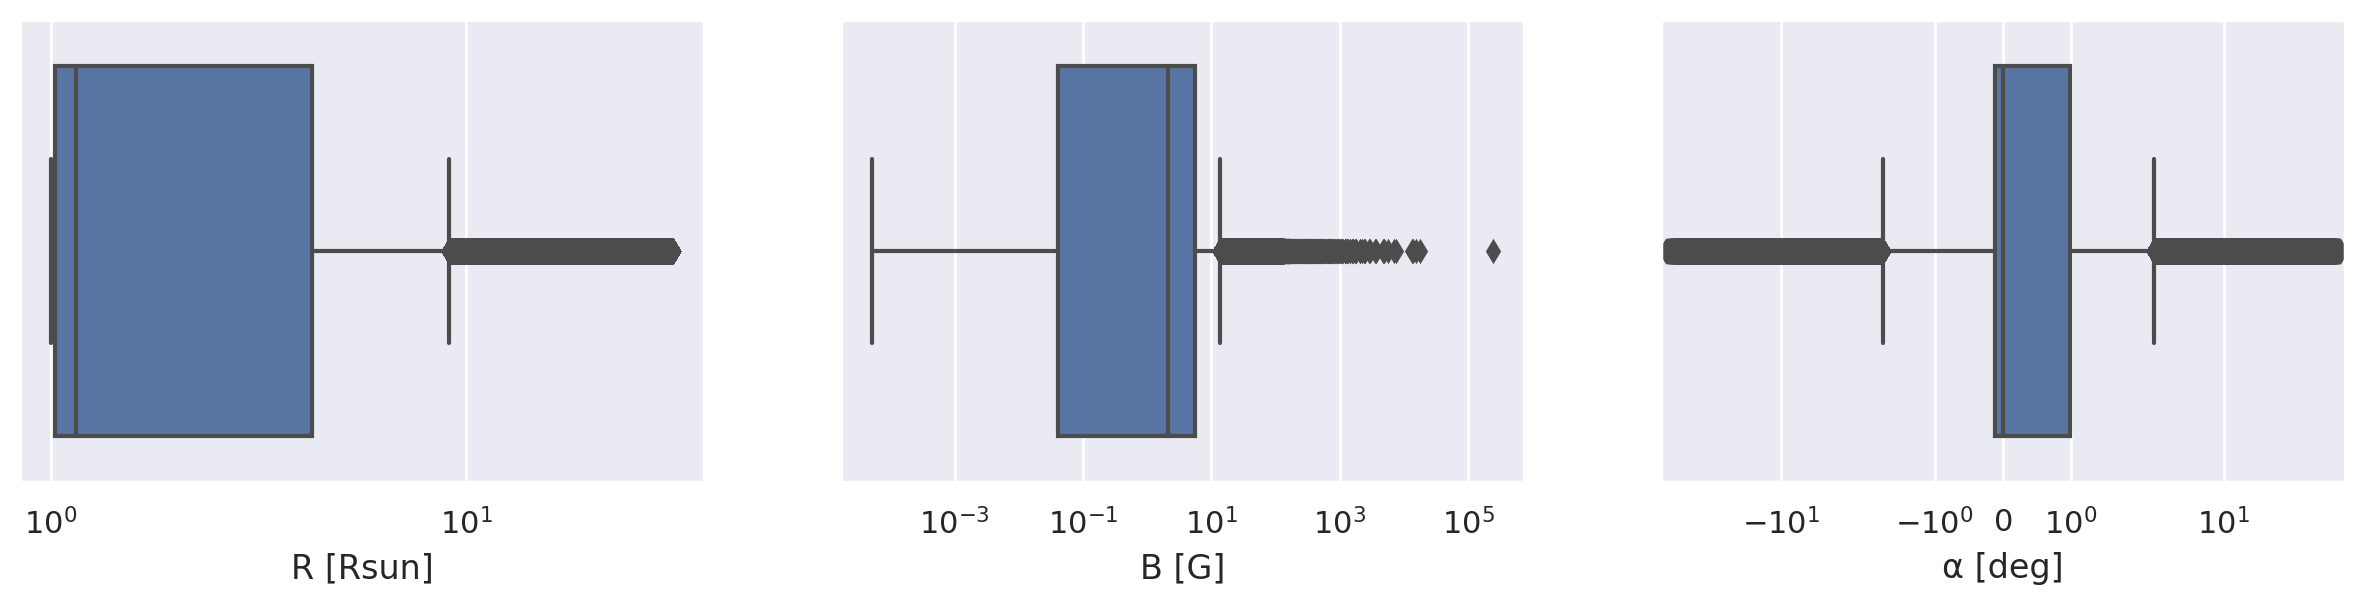

In [6]:
fig, axs = plt.subplots(1, 3, figsize=(15, 3), dpi=200)
rbp = sns.boxplot(x=inputs["R [Rsun]"], ax=axs[0])
bbp = sns.boxplot(x=inputs["B [G]"], ax=axs[1])
abp = sns.boxplot(x=inputs["alpha [deg]"], ax=axs[2])

rbp.set(xlabel="R [Rsun]", xscale="log", yticklabels=[])
bbp.set(xlabel='B [G]', xscale="log", yticklabels=[])
abp.set(xlabel='α [deg]', xscale="symlog", yticklabels=[])

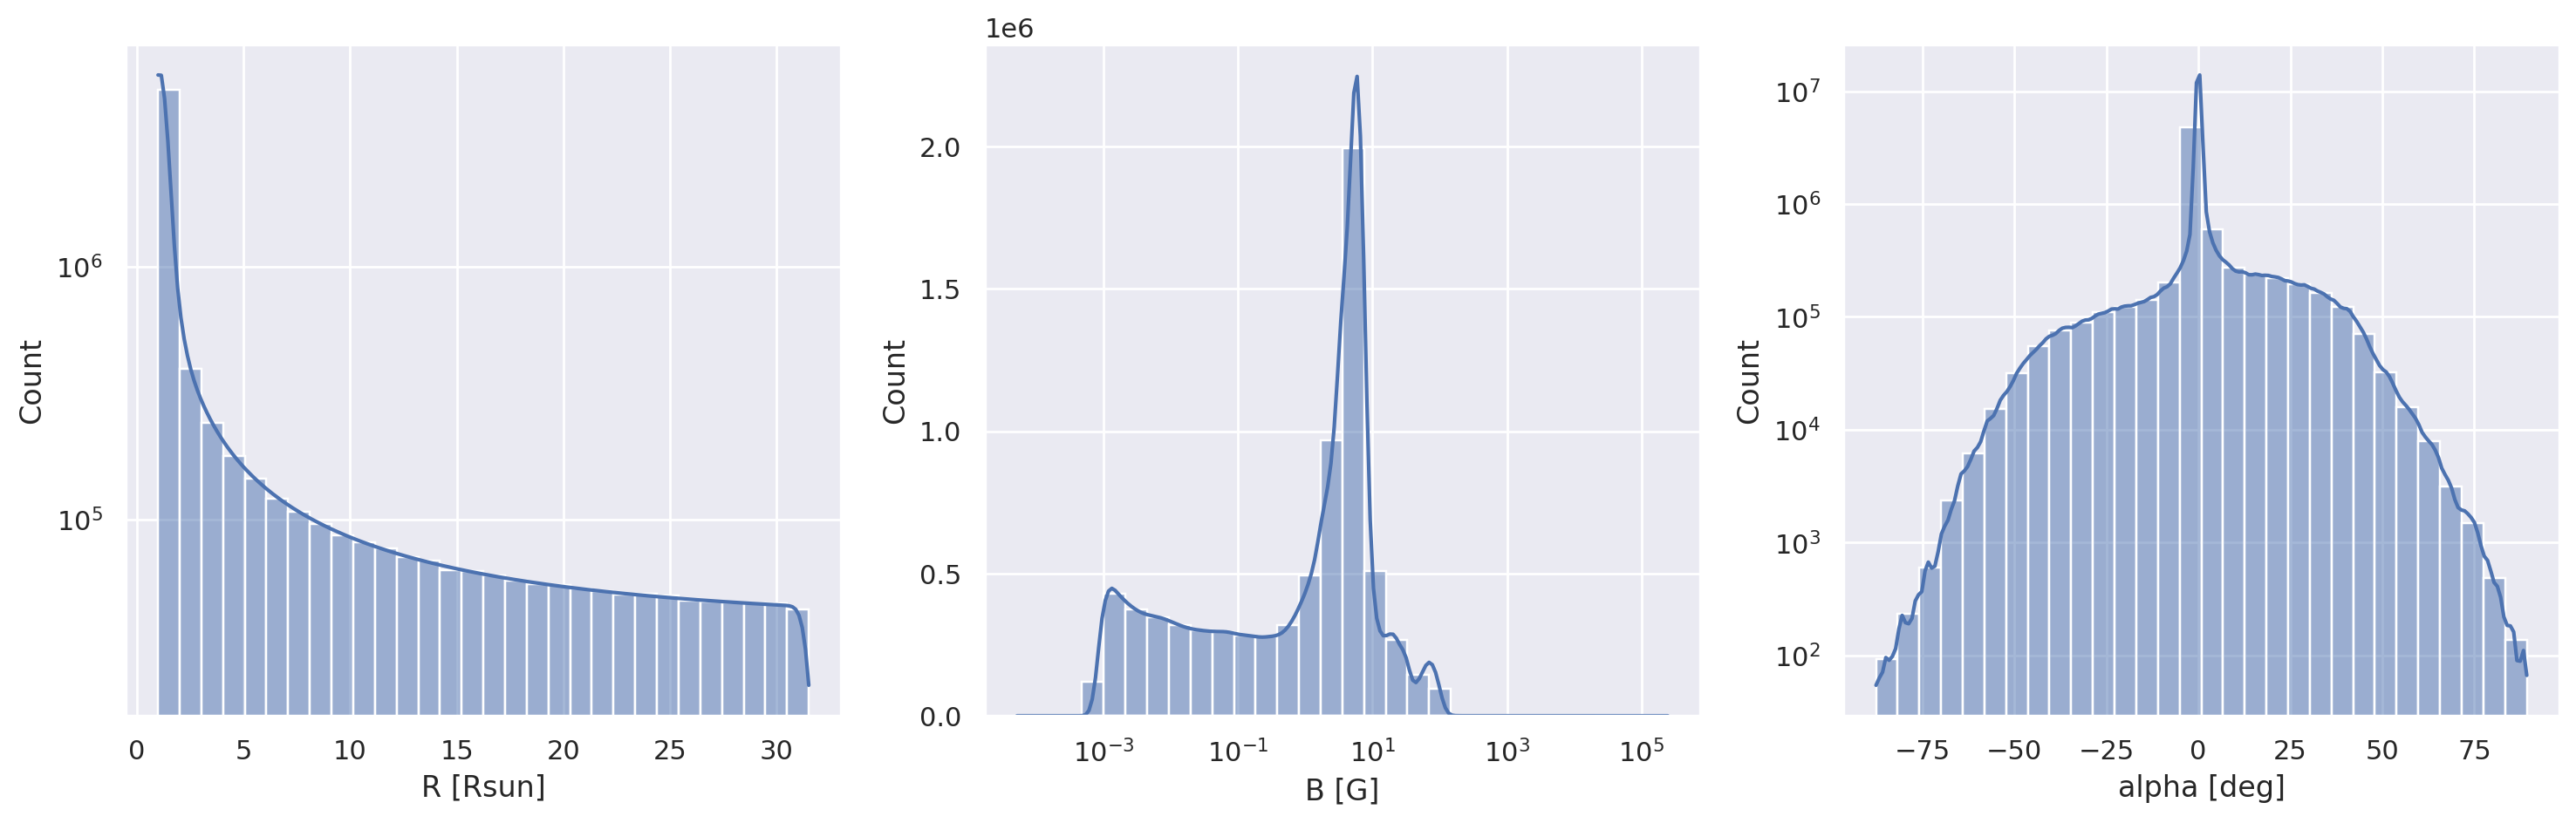

In [11]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5), dpi=200)
sns.histplot(x=inputs["R [Rsun]"], label="R [Rsun]", ax=axs[0], bins=30, kde=True)
sns.histplot(x=inputs["B [G]"], label="B [G]", ax=axs[1], bins=30, kde=True, log_scale=True)
sns.histplot(x=inputs["alpha [deg]"], label="α [deg]", ax=axs[2], bins=30, kde=True)
axs[0].set_yscale("log")
axs[2].set_yscale("log")
# plt.set_yscale("log")

<AxesSubplot: >

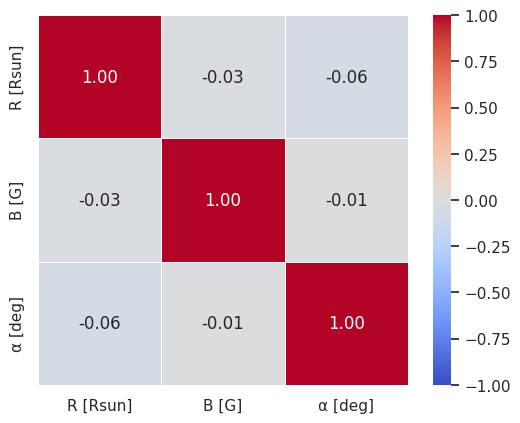

In [ ]:
corr = inputs.corr()
corr.index = ['R [Rsun]', 'B [G]', 'α [deg]']
corr.columns = ['R [Rsun]', 'B [G]', 'α [deg]']
fig, ax = plt.subplots()
sns.heatmap(corr, vmin=-1, vmax=1, center=0, square=True, xticklabels=True,
                                                yticklabels=True, figure=fig, ax=ax, annot=True, fmt='.2f',
                                                cmap='coolwarm', linewidths=.5)

# Output Variable Analysis

In [4]:
outputs = pd.DataFrame(columns=['n [cm^-3]', 'v [km/s]', 'T [MK]'])

df_list = [
    pd.read_csv(str(f), usecols=['n [cm^-3]', 'v [km/s]', 'T [MK]'])
    for f in real_files
]
outputs = pd.concat(df_list, ignore_index=True)
outputs.head()

,n [cm^-3],v [km/s],T [MK]
0,1.000640e+16,3.461815e-06,0.006
1,8.193659e+15,8.127327e-07,0.006
2,6.720874e+15,1.412319e-06,0.006
3,5.497964e+15,1.291972e-06,0.006
4,4.509855e+15,2.016613e-06,0.006


In [ ]:
outputs.describe()

,n [cm^-3],v [km/s],T [MK]
count,7.533440e+06,7.533440e+06,7.533440e+06
mean,8.630207e+13,2.553245e+02,1.384148e+00
std,6.839549e+14,2.148545e+02,8.967666e-01
min,1.972793e+01,-6.756846e-03,5.764889e-03
25%,1.622396e+04,4.926307e+01,7.178972e-01
50%,2.350818e+06,2.110216e+02,1.337099e+00
75%,2.131588e+07,4.507698e+02,2.098447e+00
max,1.009917e+16,1.889365e+03,1.989729e+01


[Text(0.5, 0, 'T [MK]'), None, [Text(0, 0, '')]]

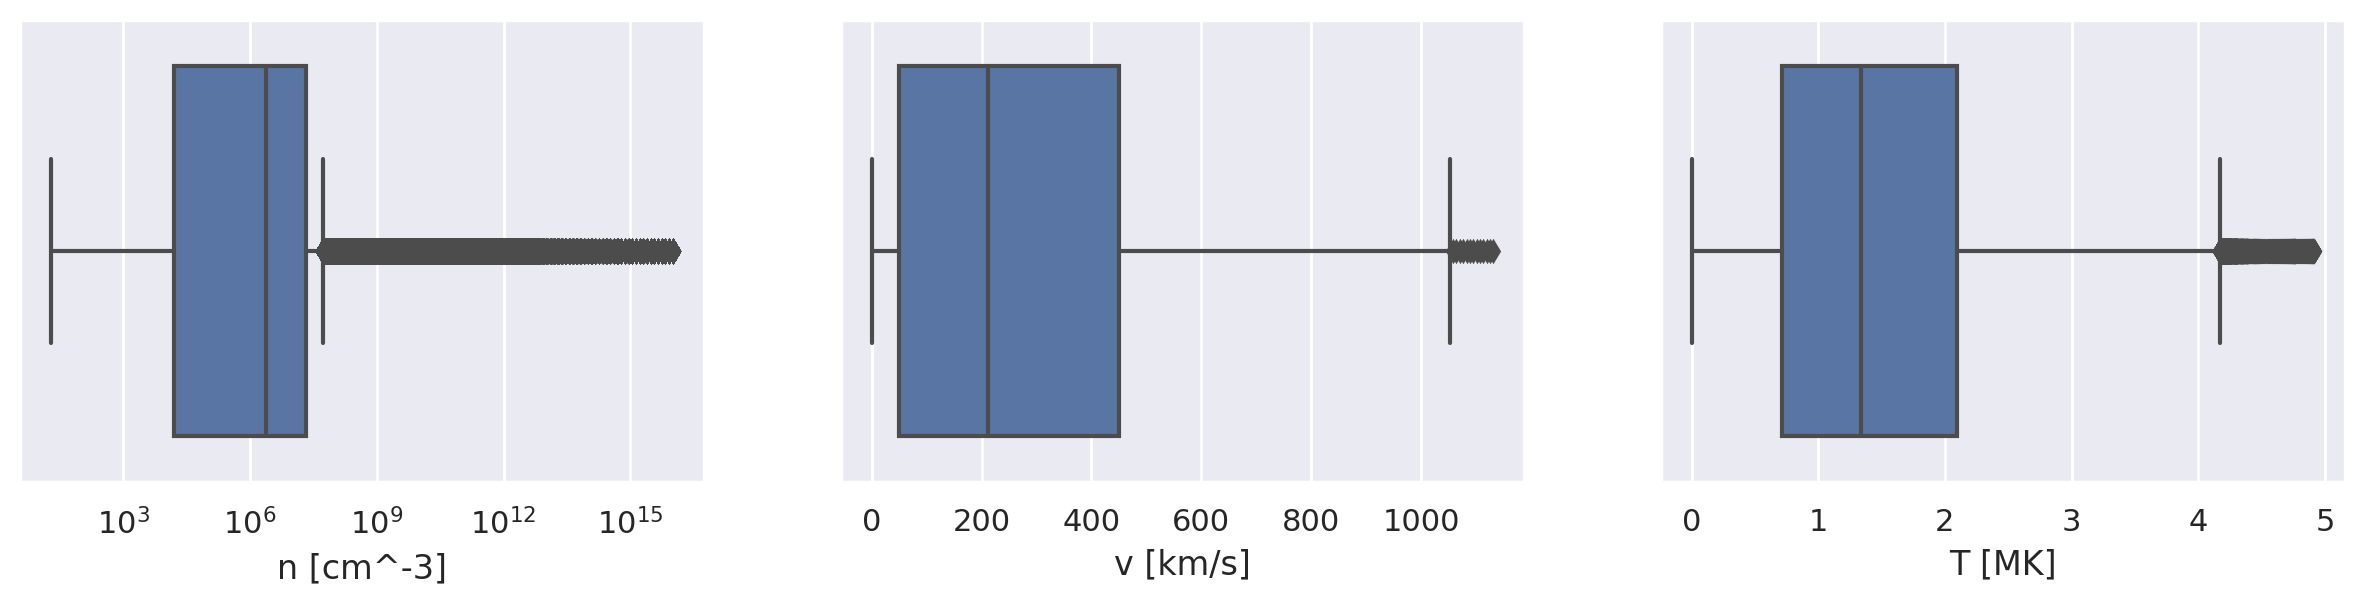

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 3), dpi=200)
rbp = sns.boxplot(x=outputs["n [cm^-3]"], ax=axs[0])
bbp = sns.boxplot(x=outputs["v [km/s]"], ax=axs[1])
abp = sns.boxplot(x=outputs["T [MK]"], ax=axs[2])


rbp.set(xlabel="n [cm^-3]", xscale="log", yticklabels=[])
bbp.set(xlabel='v [km/s]', xscale="linear", yticklabels=[])
abp.set(xlabel='T [MK]', xscale="linear", yticklabels=[])

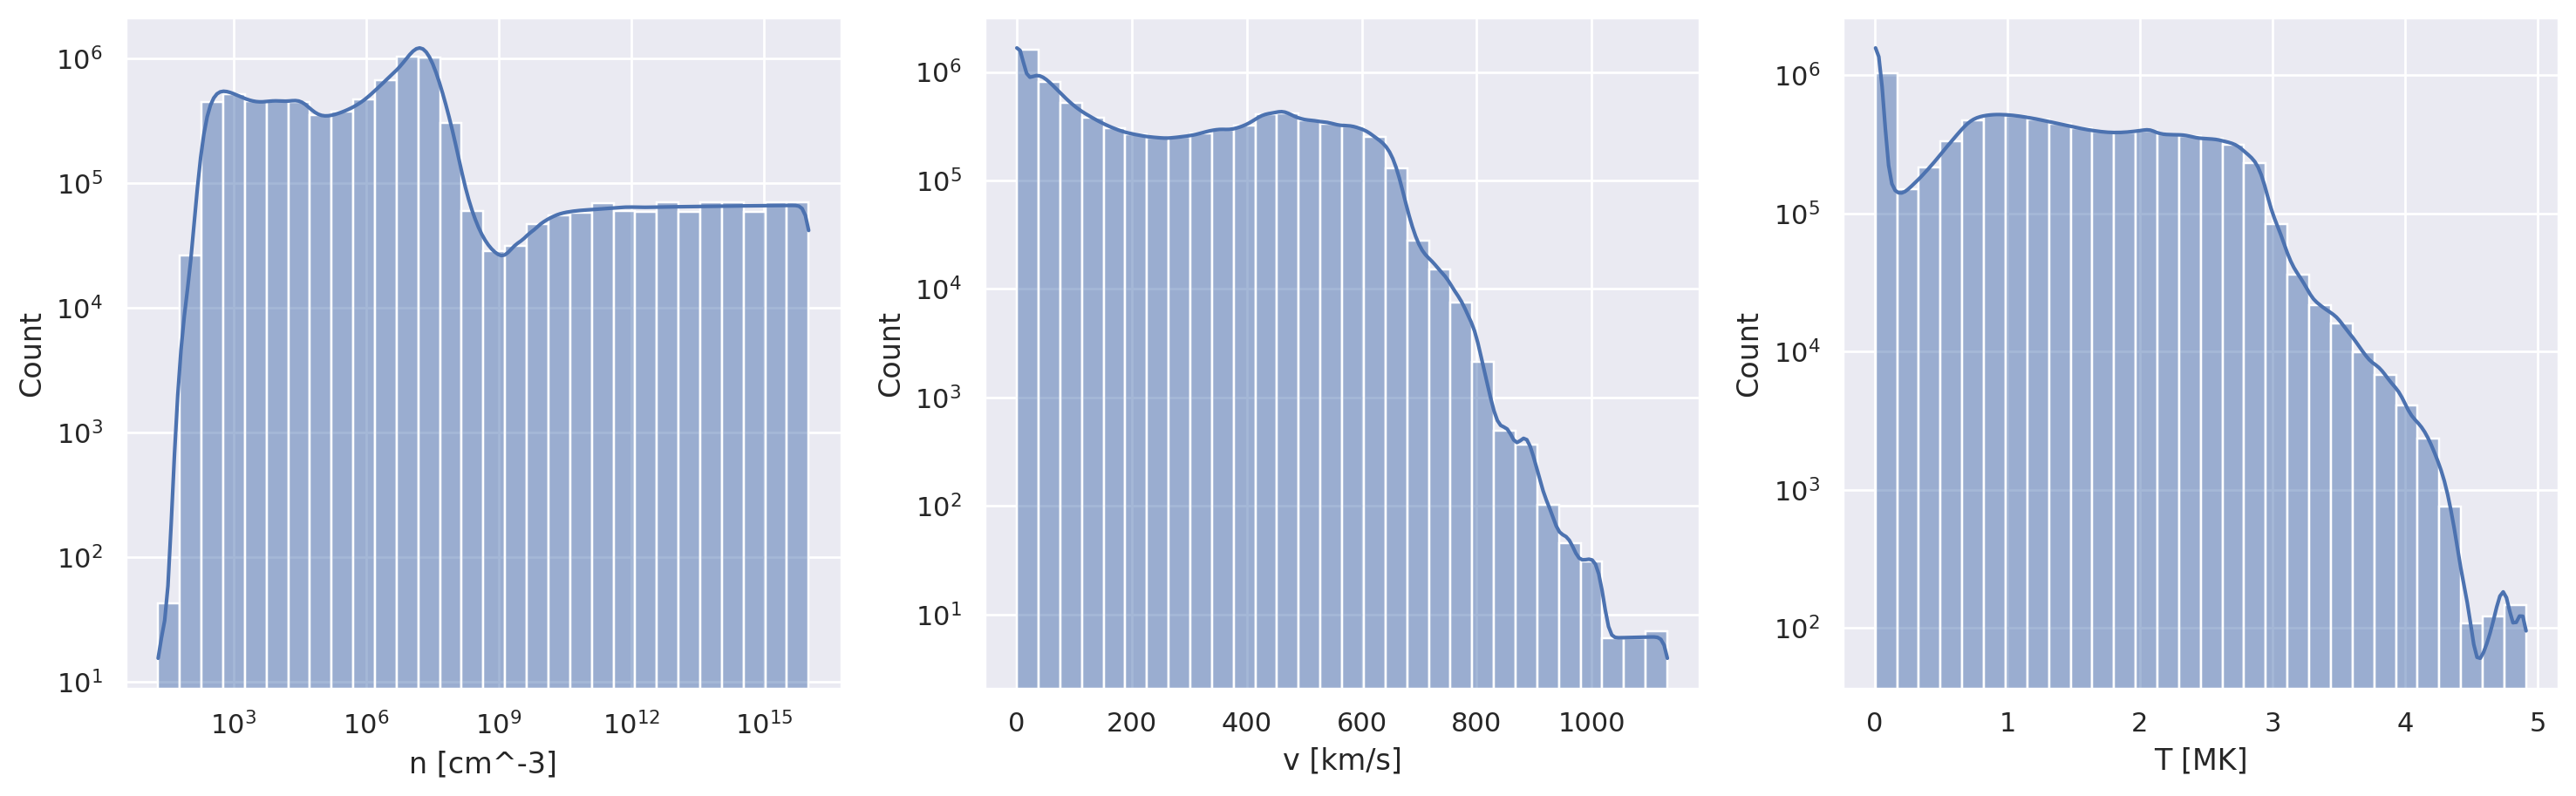

In [14]:

fig, axs = plt.subplots(1, 3, figsize=(18, 5), dpi=200)
sns.histplot(x=outputs["n [cm^-3]"], label="n [cm^-3]", ax=axs[0], bins=30, kde=True, log_scale=True)
sns.histplot(x=outputs["v [km/s]"], label="v [km/s]", ax=axs[1], bins=30, kde=True)
sns.histplot(x=outputs["T [MK]"], label="T [MK]", ax=axs[2], bins=30, kde=True)
axs[0].set_yscale("log")
axs[1].set_yscale("log")
axs[2].set_yscale("log")


<AxesSubplot: >

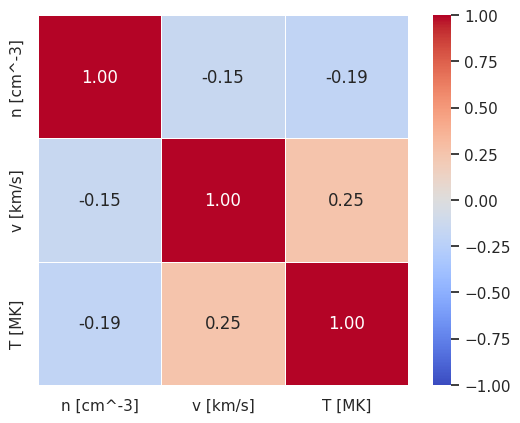

In [ ]:
outputs = outputs.astype(np.float64)
corr = outputs.corr()

fig, ax = plt.subplots()
sns.heatmap(corr, vmin=-1, vmax=1, center=0, square=True, xticklabels=True,
                                                yticklabels=True, figure=fig, ax=ax, annot=True, fmt='.2f',
                                                cmap='coolwarm', linewidths=.5)

# Joint Analysis

In [ ]:
full_df = pd.concat([inputs, outputs], axis=1)
full_df

,R [Rsun],B [G],alpha [deg],n [cm^-3],v [km/s],T [MK]
0,1.000000,35.609316,0.169335,1.000640e+16,3.461815e-06,0.006000
1,1.000104,35.599562,0.168509,8.193659e+15,8.127327e-07,0.006000
2,1.000207,35.589783,0.167667,6.720874e+15,1.412319e-06,0.006000
3,1.000311,35.579981,0.166808,5.497964e+15,1.291972e-06,0.006000
4,1.000415,35.570154,0.165933,4.509855e+15,2.016613e-06,0.006000
...,...,...,...,...,...,...
7533435,30.179626,0.000916,0.000000,3.624801e+02,5.166505e+02,0.424221
7533436,30.441164,0.000900,0.000000,3.581653e+02,5.169246e+02,0.419602
7533437,30.703397,0.000885,0.000000,3.499554e+02,5.171981e+02,0.414915
7533438,30.966313,0.000870,0.000000,3.458597e+02,5.174711e+02,0.410225


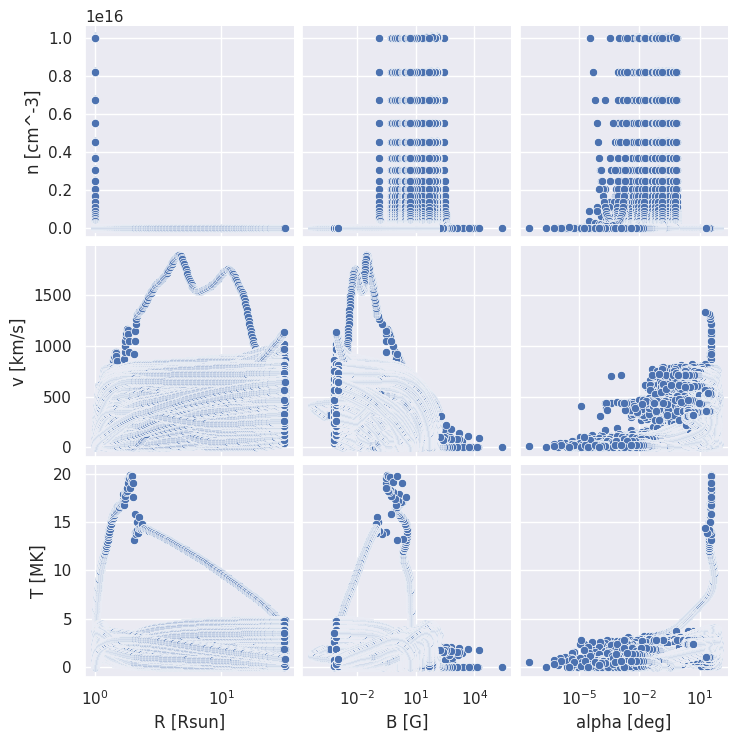

In [ ]:

pp = sns.pairplot(full_df, x_vars=['R [Rsun]', 'B [G]', 'alpha [deg]'], y_vars=['n [cm^-3]', 'v [km/s]', 'T [MK]'])
for ax in pp.axes.flat:
    ax.set_xscale("log")
    if ax.get_label() in ['n [cm^-3]', 'v [km/s]', 'T [MK]']:
        ax.set_yscale("log")

detetar e tirar o outlier de v e T

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [Text(0.5, 0, 'R [Rsun]'),
  Text(1.5, 0, 'B [G]'),
  Text(2.5, 0, 'alpha [deg]'),
  Text(3.5, 0, 'n [cm^-3]'),
  Text(4.5, 0, 'v [km/s]'),
  Text(5.5, 0, 'T [MK]')])

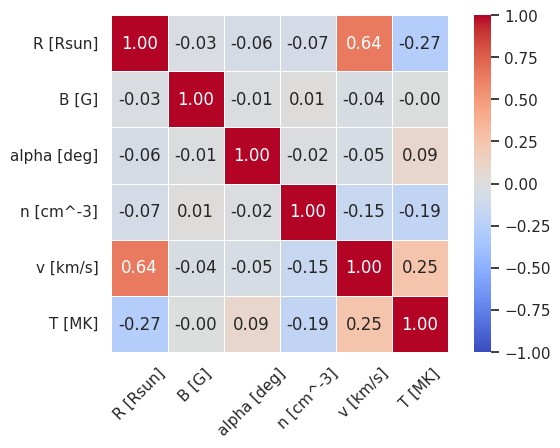

In [ ]:
corr = full_df.corr()
fig, ax = plt.subplots()
sns.heatmap(corr, vmin=-1, vmax=1, center=0, square=True, xticklabels=True,
                                                yticklabels=True, figure=fig, ax=ax, annot=True, fmt='.2f',
                                                cmap='coolwarm', linewidths=.5)
plt.tight_layout()
plt.xticks(rotation=45)

## Joint Distribution

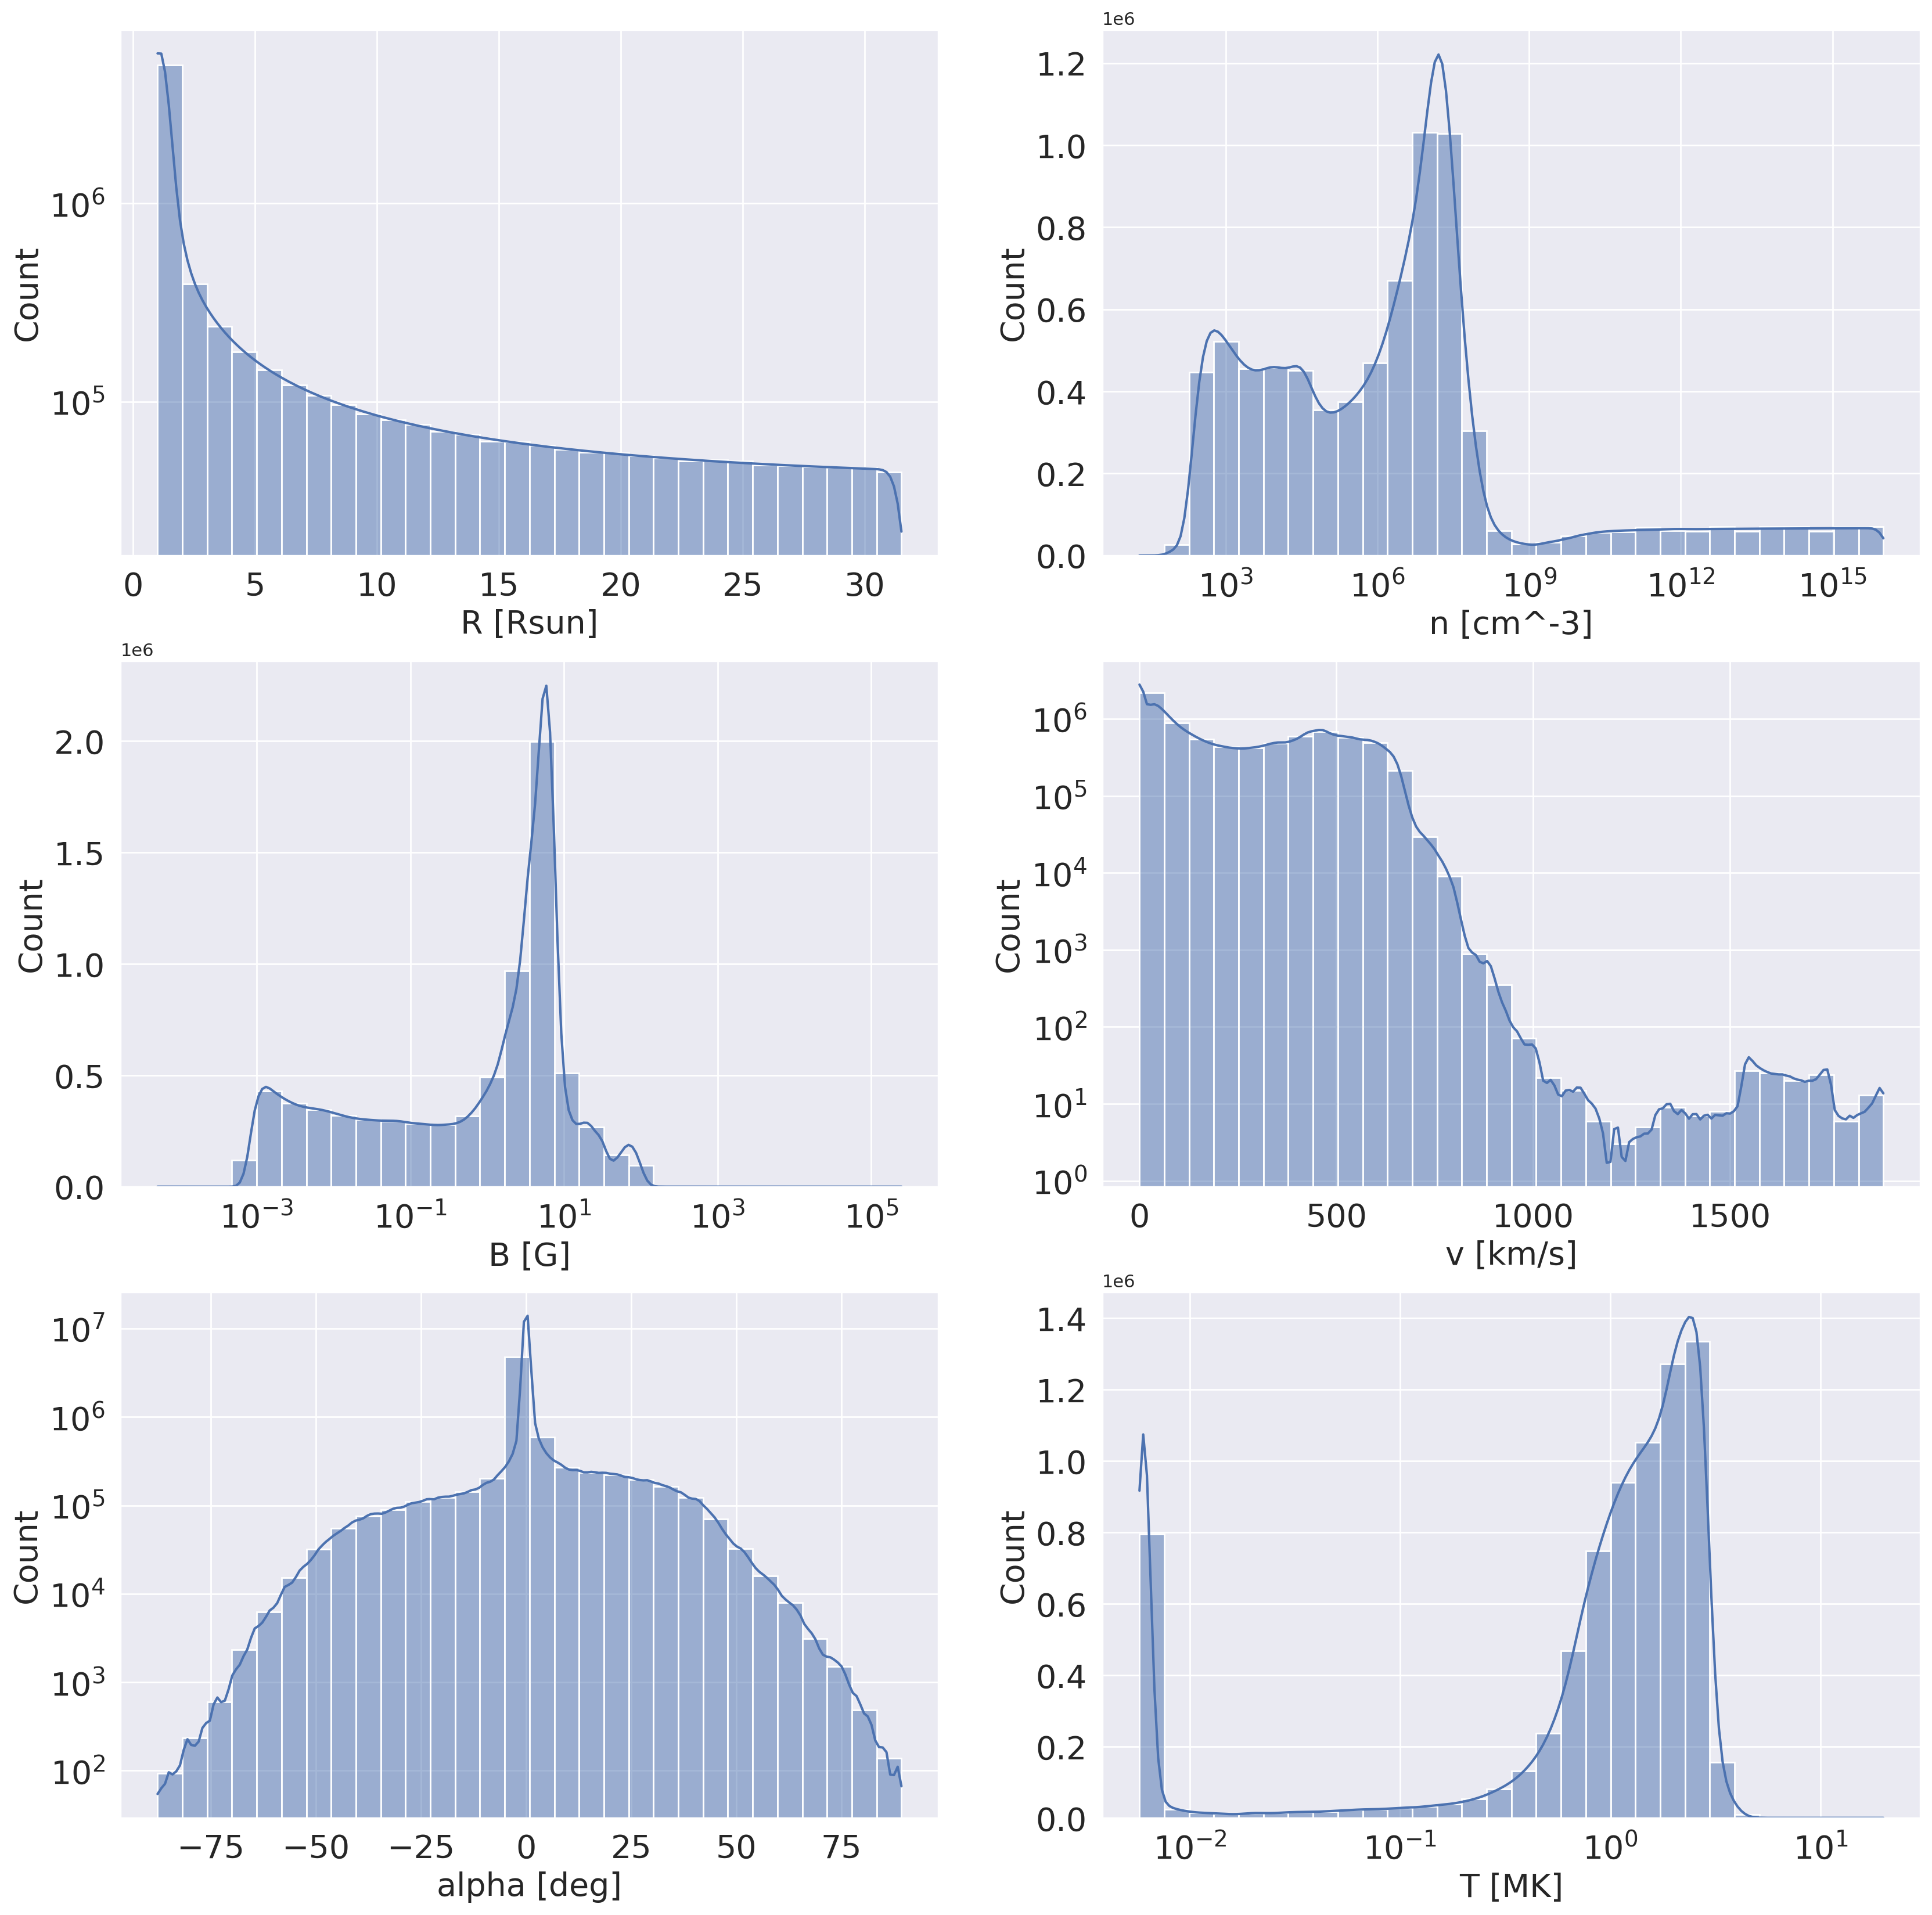

In [10]:
fig, axs = plt.subplots(3, 2, figsize=(20, 20), dpi=200)
sns.histplot(x=inputs["R [Rsun]"], label="R [Rsun]", ax=axs[0,0], bins=30, kde=True)
sns.histplot(x=inputs["B [G]"], label="B [G]", ax=axs[1,0], bins=30, kde=True, log_scale=True)
sns.histplot(x=inputs["alpha [deg]"], label="α [deg]", ax=axs[2,0], bins=30, kde=True)

sns.histplot(x=outputs["n [cm^-3]"], label="n [cm^-3]", ax=axs[0,1], bins=30, kde=True, log_scale=True)
sns.histplot(x=outputs["v [km/s]"], label="v [km/s]", ax=axs[1,1], bins=30, kde=True)
sns.histplot(x=outputs["T [MK]"], label="T [MK]", ax=axs[2,1], bins=30, kde=True, log_scale=True)

for ax in plt.gcf().axes:
    l = ax.get_xlabel()
    ax.set_xlabel(l, fontsize=20)
    ax.set_ylabel("Count", fontsize=20)
    ax.tick_params(axis="both", labelsize=20)

axs[0, 0].set_yscale("log")
# axs[1, 0].set_yscale("log")
# axs[1,0].set_xscale("log")
axs[2, 0].set_yscale("log")
# axs[0,1].set_yscale("log")
# axs[0,1].set_xscale("log")
axs[1,1].set_yscale("log")
# axs[2,1].set_yscale("log")
# axs[2,1].set_xscale("log")

